# <center> Beer Recommendation System

In [157]:
import numpy as np;
import pandas as pd;
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ssahi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [158]:
from numpy.linalg import norm

In [159]:
##Importing the data scraped from beeradvocate
data = pd.read_csv('data.csv');

## PART A - Scraping Beer Reviews

<br>1. We used webscraper.io to scrape data from **beeradvocate**.<br>2. Two selectors have been created - one link selector to capture all the 250 beer products, and one text selector to extract 25 reviews for each product. <br>3. The CSV generated has been imported to python as a dataframe for further processing.

In [160]:
##The beeradvocate website has been built in such as way that there is no specific tag for product review.
##Product reviews came with a bunch of other information and hence the data needs to be further processed

#Extracting user rating
def extract_rating(review):
    return review.split('\n')[2].split('/')[0];

data['user_rating'] = data.apply(lambda row: extract_rating(row['review']), axis = 1)
data.head()

,beer,review,user_rating
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67


In [161]:
#Extracting product review
def extract_review(review):
    return ''.join(review.split('\n')[5:-2])

data['product_review'] = data.apply(lambda row: extract_review(row['review']), axis = 1)
data.head()

,beer,review,user_rating,product_review
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ..."
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou..."
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67,Pours a jet black with very little head. Mostl...


In [162]:
data.to_csv('data_processed.csv')

## PART B - Calculate word frequency

After processing the reviews, we first tokenize each review, remove stopwords, convert it to lemmatized words, and then calculate the word frequency for all reviews. This gives us the most common words from which we can choose our beer attributes that customers' can choose from.

In [163]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [164]:
counted = Counter()

def word_frequency(sentence):
    global counted
    # joins all the sentenses
    # creates tokens, creates lower class, removes numbers and lemmatizes the words
    new_tokens = word_tokenize(sentence)
    new_tokens = [t.lower() for t in new_tokens]
    new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
    new_tokens = [t for t in new_tokens if t.isalpha()]
    
    lemmatizer = WordNetLemmatizer()
    new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
        
    #counts the words, pairs and trigrams
    counted = counted + Counter(new_tokens)
    
    return ' '.join(new_tokens)

In [165]:
data['review_tokens_final'] = data['product_review'].apply(word_frequency)

In [167]:
new_df = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
new_df[:30]

,word,frequency
99,beer,5525
21,head,3560
159,taste,2844
35,chocolate,2797
104,flavor,2738
17,dark,2714
231,sweet,2365
37,like,2357
489,note,2308
14,one,2261


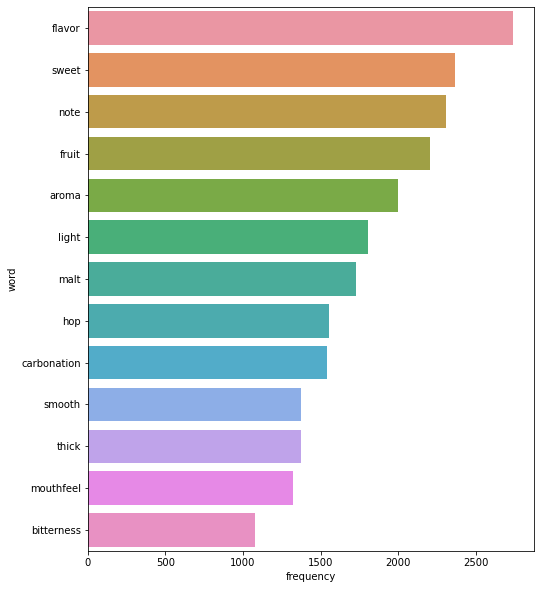

In [226]:
# create subplot of the different data frames
attributes = ["flavor", "sweet", "note", "fruit", "aroma", "light", "malt",
              "hop", "carbonation", "smooth", "thick", "mouthfeel", "bitterness"]
fig, axes = plt.subplots(1,1,figsize=(8,10))
sns.barplot(ax=axes,x='frequency',y='word',data=new_df[new_df["word"].apply(lambda x: (x in attributes))]);

In [227]:
new_df.to_csv('word_frequency_beer.csv',index=False)

### **TOP ATTRIBUTES OF BEER AS SEEN FROM WORD FREQUENCY ANALYSIS:**<br>
*flavor, sweet, note, fruit, aroma, light, malt, hop, carbonation, smooth, thick, mouthfeel, bitterness*

### Asking for user input

In [169]:
attribute_list = ['','','']
attribute_list[0] = input('List top 3 beer attributes based on preference: flavor, sweet, note, fruit, aroma, light, malt, hop, carbonation, smooth, thick, mouthfeel, bitterness\n\nFirst preference: ')
attribute_list[1] = input('Second preference: ')
attribute_list[2] = input('Third preference: ')

List top 3 beer attributes based on preference: flavor, sweet, note, fruit, aroma, light, malt, hop, carbonation, smooth, thick, mouthfeel, bitterness

First preference: flavor
Second preference: sweet
Third preference: aroma


In [170]:
attribute_list

['flavor', 'sweet', 'aroma']

## PART C - Similiarity Analysis

After determining the three most important attributes for the user, we created a $n*m$ matrix where n is the number of reviews and m is the number of attributes, concatenated it with the review data and calculated the count of each attribute in each review for each beer. We then performed the cosine similarity using the bag of words method to see which top beers should be recommended basis the attributes the user cares about.

In [171]:
import numpy as np

In [172]:
import pandas as pd
#data=pd.read_csv('product_review.csv')

# creating attribute wise columns to get occurence into a dataframe
attribute_occurence_df = pd.DataFrame(np.zeros((data.shape[0], len(attribute_list))))
attribute_occurence_df.columns = attribute_list


attribute_occurence_df = pd.concat([data, attribute_occurence_df], axis=1)


In [173]:
attribute_occurence_df.head()

,beer,review,user_rating,product_review,review_tokens_final,flavor,sweet,aroma
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,0.0,0.0,0.0
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,0.0,0.0,0.0
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,0.0,0.0,0.0
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,0.0,0.0,0.0
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,0.0,0.0,0.0


In [174]:
# geting occurence columns populated
for c in attribute_occurence_df.iloc[:, 5:]:
    attribute_occurence_df[c] = attribute_occurence_df['product_review'].str.\
    count(c)#.map(lambda lst: len(lst))

In [175]:
attribute_occurence_df.head()

,beer,review,user_rating,product_review,review_tokens_final,flavor,sweet,aroma
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,0,1,1
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,1,0,2
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,0,1,0
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,1,1,0
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,0,0,0


In [176]:
attribute_occurence_df = attribute_occurence_df[
    (attribute_occurence_df.iloc[:, 5:].sum(axis = 1) != 0)]
attribute_occurence_df.head()

,beer,review,user_rating,product_review,review_tokens_final,flavor,sweet,aroma
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,0,1,1
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,1,0,2
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,0,1,0
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,1,1,0
5,Imperial German Chocolate Cupcake Stout,pmarlowe from Virginia\n\n4.21/5 rDev -7.1%\n...,4.21,2019 vintage. Released a week or two ago. A: ...,vintage released week two ago pours jet black ...,1,3,1


In [177]:
def cosineSimilarity(review_att, cust_input):
    return np.dot(review_att, cust_input) / (norm(review_att) * norm(cust_input))

In [178]:
attribute_occurence_df['similarity_score'] = attribute_occurence_df.iloc[:, 5:].apply(
    lambda x : cosineSimilarity(x.values, np.array([1,1,1])), axis = 1).\
sort_values(ascending=False)
attribute_occurence_df.head()

,beer,review,user_rating,product_review,review_tokens_final,flavor,sweet,aroma,similarity_score
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,0,1,1,0.816497
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,1,0,2,0.774597
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,0,1,0,0.577350
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,1,1,0,0.816497
5,Imperial German Chocolate Cupcake Stout,pmarlowe from Virginia\n\n4.21/5 rDev -7.1%\n...,4.21,2019 vintage. Released a week or two ago. A: ...,vintage released week two ago pours jet black ...,1,3,1,0.870388


In [179]:
attribute_occurence_df.sort_values('similarity_score', ascending=False)

avg_review_similarity = attribute_occurence_df.groupby('beer')['similarity_score'].mean().reset_index()
avg_review_similarity = avg_review_similarity.sort_values('similarity_score', ascending=False)

avg_review_similarity

,beer,similarity_score
212,Sosus,0.783094
121,Haze,0.766056
206,Sip Of Sunshine,0.762599
45,Bourbon Barrel Oro Negro,0.761917
147,Kaggen! Stormaktsporter,0.756184
...,...,...
238,Vanilla Bean Assassin,0.596469
229,Thicket,0.594432
35,Black Tuesday - Reserve,0.590500
39,Blåbær Lambik,0.577350


In [180]:
print('The Top 3 beers are: \n' + '1. ' +avg_review_similarity['beer'][0]+'\n' + '2. ' + avg_review_similarity['beer'][1] + ' \n' + '3. ' + avg_review_similarity['beer'][2])

The Top 3 beers are: 
1. A Deal With The Devil
2. A Deal With The Devil - Double Oak-Aged 
3. Aaron


## PART D - Sentiment Analysis

Next, we try to capture the sentiments of individual reviews using VADER Sentiment Analysis. The Compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). Using the compound score, we can determine the top brands with highest compound score.

In [128]:
!pip install vaderSentiment

In [181]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
    
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive",sentiment_dict['compound']
 
    elif sentiment_dict['compound'] <= -0.05 :
        return "Negative",sentiment_dict['compound']
 
    else :
        return "Neutral",sentiment_dict['compound']

In [182]:
data['sentiment'] = data['review_tokens_final'].apply(sentiment_scores)

data.head()

,beer,review,user_rating,product_review,review_tokens_final,sentiment
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,"(Positive, 0.9837)"
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,"(Positive, 0.9872)"
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,"(Positive, 0.802)"
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,"(Positive, 0.6249)"
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,"(Positive, 0.8979)"


In [183]:
data['compound_score'] = list(zip(*data['sentiment']))[1]
data['sentiment'] = list(zip(*data['sentiment']))[0]

In [184]:
data.head()

,beer,review,user_rating,product_review,review_tokens_final,sentiment,compound_score
0,Rare Scooop,Kdouble from Tennessee\n\n4.84/5 rDev +2.8%\n...,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,Positive,0.9837
1,Gueuze 100% Lambic,mynie from Maryland\n\n4.8/5 rDev +7.1%\nlook...,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,Positive,0.9872
2,Speedway Stout - Bourbon Barrel-Aged,REVZEB from Illinois\n\n4.52/5 rDev -0.4%\nlo...,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,Positive,0.8020
3,Hopslam Ale,FL_Man from Florida\n\n4.62/5 rDev +2.9%\nloo...,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,Positive,0.6249
4,Bourbon County Brand Stout,beerguy04 from Illinois\n\n4.67/5 rDev +0.2%\...,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,Positive,0.8979


In [187]:
avg_review_sentiment = data.groupby('beer')['compound_score'].mean().reset_index()
avg_review_sentiment = avg_review_sentiment.sort_values('compound_score', ascending=False)
avg_review_sentiment = avg_review_sentiment.reset_index(drop=True)
avg_review_sentiment.head()

,beer,compound_score
0,Hunahpu's Imperial Stout - Laird's Apple Brand...,0.921020
1,Double Stack,0.920028
2,Cable Car Kriek,0.918396
3,Mother Of All Storms,0.914004
4,Ann,0.903492


In [188]:
data['sentiment'].value_counts()

Positive    5942
Negative     191
Neutral       94
Name: sentiment, dtype: int64

In [189]:
data.columns

Index(['beer', 'review', 'user_rating', 'product_review',
       'review_tokens_final', 'sentiment', 'compound_score'],
      dtype='object')

In [190]:
data = data[['beer', 'user_rating', 'product_review',
       'review_tokens_final', 'sentiment', 'compound_score']]
data.head()

,beer,user_rating,product_review,review_tokens_final,sentiment,compound_score
0,Rare Scooop,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,Positive,0.9837
1,Gueuze 100% Lambic,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,Positive,0.9872
2,Speedway Stout - Bourbon Barrel-Aged,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,Positive,0.8020
3,Hopslam Ale,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,Positive,0.6249
4,Bourbon County Brand Stout,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,Positive,0.8979


In [191]:
data.to_csv('reviews_sentiment_score.csv')

## PART E - Calculate composite score based on similarity and sentiment scores

Combining the sentiment scores with the similarity scores, we can determine the top beer brands that have maximum cosine similarity with the customer's preferred attributes as well as a high positive sentiment as indicated by a high compound score value.

In [215]:
review = avg_review_similarity.merge(avg_review_sentiment, on='beer')
review['score'] = (review['similarity_score']+review['compound_score'])
review = review.sort_values('score', ascending=False)
review = review.reset_index(drop=True)
review.head(3)

,beer,similarity_score,compound_score,score
0,Cable Car Kriek,0.751010,0.918396,1.669406
1,Hunahpu's Imperial Stout - Laird's Apple Brand...,0.721013,0.921020,1.642033
2,Bourbon Barrel Oro Negro,0.761917,0.877516,1.639433


In [216]:
print(f"The Top 3 recommendations are:\n1. {review.beer[0]} \n2. {review.beer[1]} \n3. {review.beer[2]}")

The Top 3 recommendations are:
1. Cable Car Kriek 
2. Hunahpu's Imperial Stout - Laird's Apple Brandy Barrel 
3. Bourbon Barrel Oro Negro


## PART F - Similarity Analysis using word vectors

To recommend wine as per a customer's taste, we have picked up adjectives that were used to describe wine most frequently (word frequency analysis) and performed a similarity analysis for the 3 attributes and each review. We then found out the average similarity of every beer across the three attributes.

In [219]:
# !pip install spacy

In [220]:
# !python -m spacy download en_core_web_md 

In [194]:
import spacy
nlp = spacy.load('en_core_web_md')
att1 = attribute_list[0]
att2 = attribute_list[1]
att3 = attribute_list[2]

def get_similarity(review, att):
    review_nlp = nlp(review)
    sim_score = review_nlp.similarity(nlp(att))
    return sim_score

data['sim_score_'+attribute_list[0]] = data['product_review'].apply(lambda x: get_similarity(x,att1))
data['sim_score_'+attribute_list[1]] = data['product_review'].apply(lambda x: get_similarity(x,att2))
data['sim_score_'+attribute_list[2]] = data['product_review'].apply(lambda x: get_similarity(x,att3))
data.head()

,beer,user_rating,product_review,review_tokens_final,sentiment,compound_score,sim_score_flavor,sim_score_sweet,sim_score_aroma
0,Rare Scooop,4.84,The listing says this is retired but Cycle had...,listing say retired cycle tap barrel aged day ...,Positive,0.9837,0.496302,0.601576,0.401016
1,Gueuze 100% Lambic,4.8,"2018 vintage, 33cl bottle with a picture of a ...",vintage bottle picture little statue cherub ho...,Positive,0.9872,0.498774,0.613978,0.431990
2,Speedway Stout - Bourbon Barrel-Aged,4.52,"Had on tap. At last, the stout that I have sou...",tap last stout sought longest disappoint midni...,Positive,0.8020,0.532345,0.634857,0.419406
3,Hopslam Ale,4.62,Hopslam is yet another classic Bell's top-of-t...,hopslam yet another classic bell brew sweetnes...,Positive,0.6249,0.562371,0.615964,0.421378
4,Bourbon County Brand Stout,4.67,Pours a jet black with very little head. Mostl...,pours jet black little head mostly tan bubble ...,Positive,0.8979,0.574821,0.656790,0.448895


In [195]:
recommend = data.groupby('beer')['sim_score_'+attribute_list[0],'sim_score_'+attribute_list[1],'sim_score_'+attribute_list[2]].mean()
recommend['spacy_score'] = (recommend['sim_score_'+attribute_list[0]] + recommend['sim_score_'+attribute_list[1]] + recommend['sim_score_'+attribute_list[2]])/3  
recommend = recommend.sort_values(by = 'spacy_score', ascending=False)

recommend.head(3)

,sim_score_flavor,sim_score_sweet,sim_score_aroma,spacy_score
beer,,,,
Double Dry Hopped Double Mosaic Daydream,0.582598,0.681526,0.465010,0.576378
Double Dry Hopped Congress Street,0.580172,0.680044,0.463374,0.574530
Beer Geek Vanilla Shake - Bourbon Barrel-Aged,0.583338,0.681027,0.456752,0.573706


In [196]:
print(f"The Top 3 recommendations are:\n1. {recommend.index[0]} \n2. {recommend.index[1]} \n3. {recommend.index[2]}")

The Top 3 recommendations are:
1. Double Dry Hopped Double Mosaic Daydream 
2. Double Dry Hopped Congress Street 
3. Beer Geek Vanilla Shake - Bourbon Barrel-Aged


### Combining with sentiment compound_score:

To determine the beer best suited to the three attributes, we calculated a combined score based on the positive sentiment value associated to a review and the similarity score of that review. We then retrieved the top 3 beers based off this combined score, these beer brands best suit the attributes in question and have the most positive sentiments attached to them as well.

In [213]:
review_spacy = recommend.merge(avg_review_sentiment, on='beer')
review_spacy['score'] = (review_spacy['spacy_score']+review_spacy['compound_score'])
review_spacy = review_spacy.sort_values('score', ascending=False)
review_spacy = review_spacy.reset_index(drop=True)
review_spacy.head(3)

,beer,sim_score_flavor,sim_score_sweet,sim_score_aroma,spacy_score,compound_score,score
0,Mother Of All Storms,0.566435,0.664830,0.446154,0.559140,0.914004,1.473144
1,All That Is And All That Ever Will Be,0.585705,0.679494,0.440508,0.568569,0.883244,1.451813
2,Cable Car Kriek,0.531220,0.646041,0.422632,0.533297,0.918396,1.451693


In [214]:
print(f"The Top 3 recommendations are:\n1. {review_spacy.beer[0]} \n2. {review_spacy.beer[1]} \n3. {review_spacy.beer[2]}")

The Top 3 recommendations are:
1. Mother Of All Storms 
2. All That Is And All That Ever Will Be 
3. Cable Car Kriek


## PART G - Recommending based on only top ratings

Above, we have tried to rank beers based on text analysis techniques like sentiment analysis, and cosine similarities. Below, we try to recommend beers without considering any information gained from this analysis and only checking the ratings given by customers in order to determine how closely the ratings mirror the reviews given by customers.

In [199]:
data["user_rating"] = data["user_rating"].astype("float")
generic_recommendations = data.groupby(["beer"])["user_rating"].agg("mean").sort_values(ascending = False)[:3]
generic_recommendations

beer
Chemtrailmix             4.77160
Vanilla Bean Assassin    4.74625
Blessed                  4.74280
Name: user_rating, dtype: float64

In [201]:
print("The Top 3 recommendations are:")
i=1
for index, score in generic_recommendations.iteritems():
    print("\t",i,'\b.',index,"({score})".format(score = round(score,3)))
    i+=1
generic_recommendations = generic_recommendations.index.to_list()

The Top 3 recommendations are:
	 1 . Chemtrailmix (4.772)
	 2 . Vanilla Bean Assassin (4.746)
	 3 . Blessed (4.743)


['Chemtrailmix', 'Vanilla Bean Assassin', 'Blessed']

Therefore, we observe that, upon simply recommending the top rated bees to the customers, we would **ALWAYS** recommend _**'Chemtrailmix', 'Vanilla Bean Assassin', 'Blessed'**_ to our users **IRRESPECTIVE OF THEIR PREFERENCES**

Upon comparing our generic recommendations with the results of the _BagOfWords + Sentiment Analysis_ approach, we observe that our generic brands rank a lowly $ \# 37^{th}, \# 91^{st}, \text{and } \# 240^{th}$ respectively! Clearly not the best brands to offer

In [217]:
review[review["beer"].apply(lambda x: x in generic_recommendations)][["beer","score"]]

,beer,score
36,Chemtrailmix,1.543547
90,Blessed,1.495260
238,Vanilla Bean Assassin,1.332562


Similarly, Upon comparing our generic recommendations with the results of the _SpaCy + Sentiment Analysis_ approach, we observe that our generic brands rank even worse! $\#102^{nd}, \#122^{nd}, \text{and } \#218^{th}$ respectively!

In [218]:
review_spacy[review_spacy["beer"].apply(lambda x: x in generic_recommendations)][["beer","score"]]

,beer,score
102,Chemtrailmix,1.353704
122,Blessed,1.340631
218,Vanilla Bean Assassin,1.258065


Thus, to conclude, we observe that if we have to truly serve the consumer and provide them with recommendations fine-tuned to their specific requirements, considering only the product ratings is not enough. We need to take into account the context of the rating and see which attributes of the products actually stand out.

This has huge business implications; for example: 
- **Amazon** can benifit from ranking products by their relevance to the user's needs rather than just promoting the best rated products!
- **Yelp** could recommend businesses that match users particular requirements instead of purely recommending on the basis of some tags attributed with their business.

Such an approach also provides real-time feedback to the management and they can chalk out their product strategy accordingly.

***
***